In [2]:
import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib import style 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# EDA

In [3]:
df = pd.read_csv('../datasets/segmentation_data.csv')

In [4]:
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [8]:
## Checking missing values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
# checking nunique and type per columns:
df_nunique = pd.DataFrame([[col , df[col].nunique(),df[col].dtypes] for col in df.columns],columns=['col','nunique','type'])
df_nunique

col  nunique   type
0               ID     2000  int64
1              Sex        2  int64
2   Marital status        2  int64
3              Age       58  int64
4        Education        4  int64
5           Income     1982  int64
6       Occupation        3  int64
7  Settlement size        3  int64

In [10]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
df[cat_columns] = df[cat_columns].astype('str')

In [11]:
df.describe().T

count          mean           std          min           25%  \
ID      2000.0  1.000010e+08    577.494589  100000001.0  1.000005e+08   
Age     2000.0  3.590900e+01     11.719402         18.0  2.700000e+01   
Income  2000.0  1.209544e+05  38108.824679      35832.0  9.766325e+04   

                50%           75%          max  
ID      100001000.5  1.000015e+08  100002000.0  
Age            33.0  4.200000e+01         76.0  
Income     115548.5  1.380722e+05     309364.0

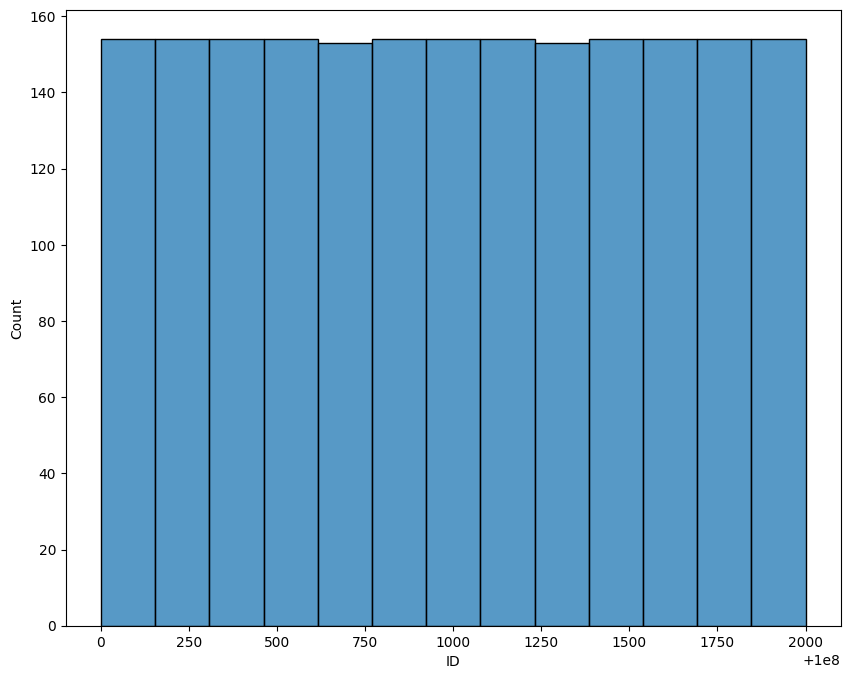

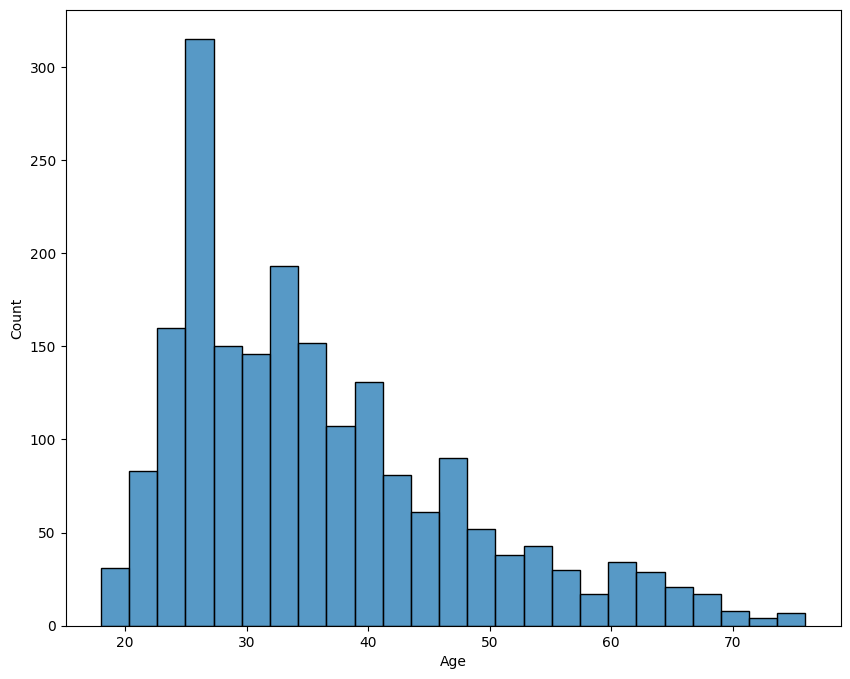

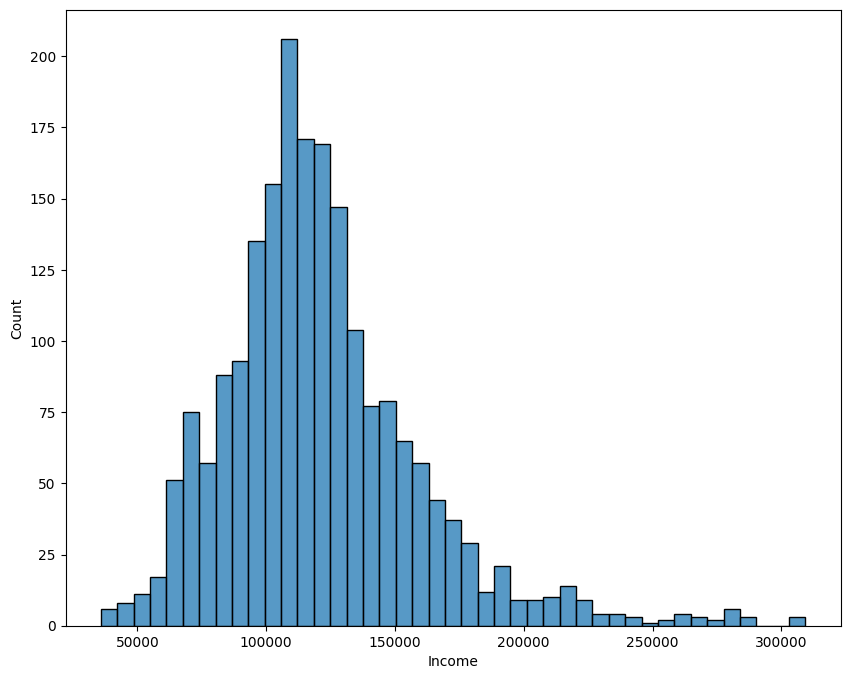

In [12]:
## Numerical variables distribution
for col in num_columns:
    plt.figure(figsize=(10,8))
    sns.histplot(data = df, x = col)

## Conclusions
1. Id has a uniform distribution (isn't an important variable)
2. The variable 'Age' has a heavy right skew, generated because of the lower limit at zero of the variable. If we are using K-Means clustering, there will be no need to normalize the feature, but we may have to do so for other models.
3. The feature 'Income' has the same right skew problem as the 'Age' feature. We'll have to be wary of this depending on the model we select.

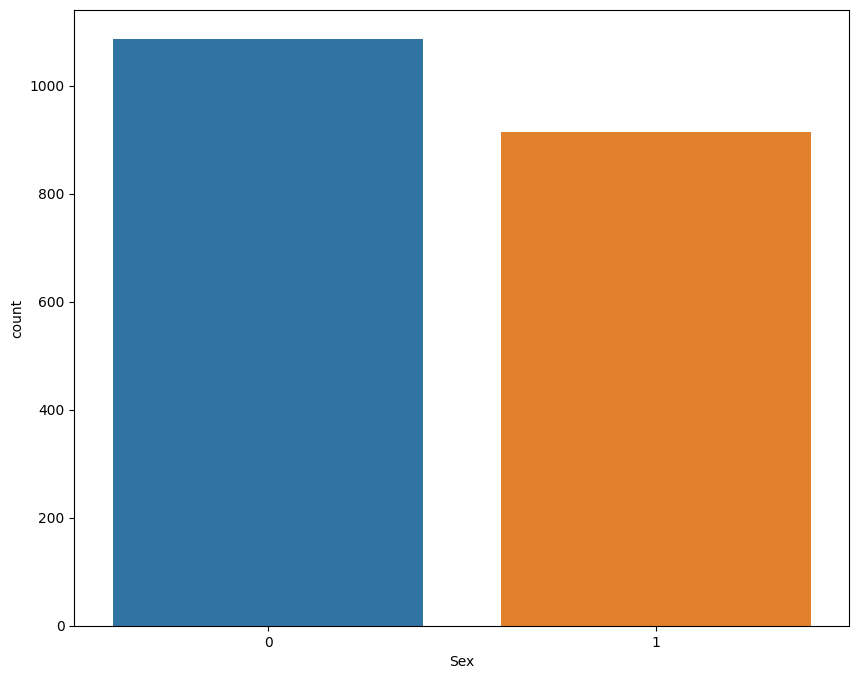

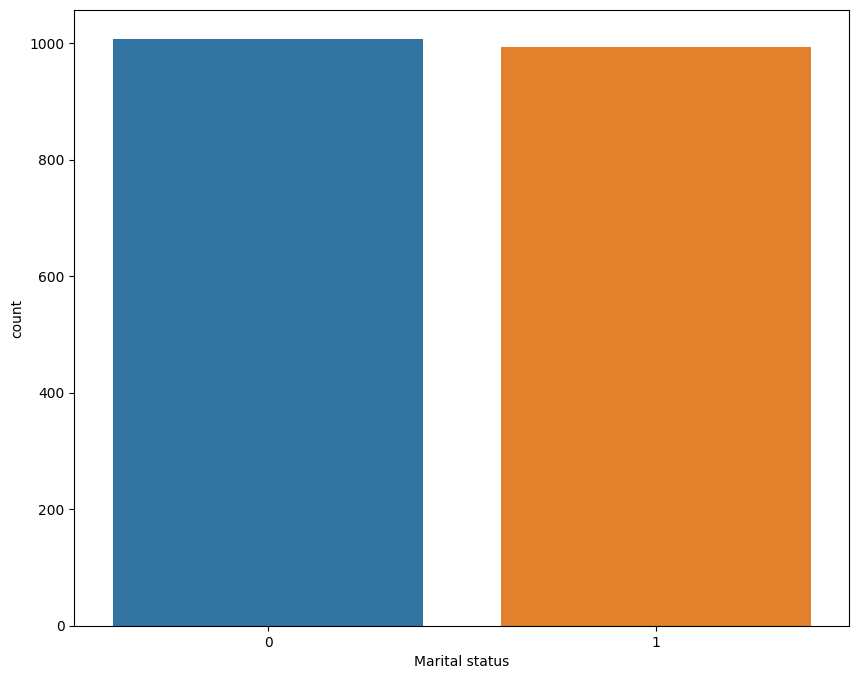

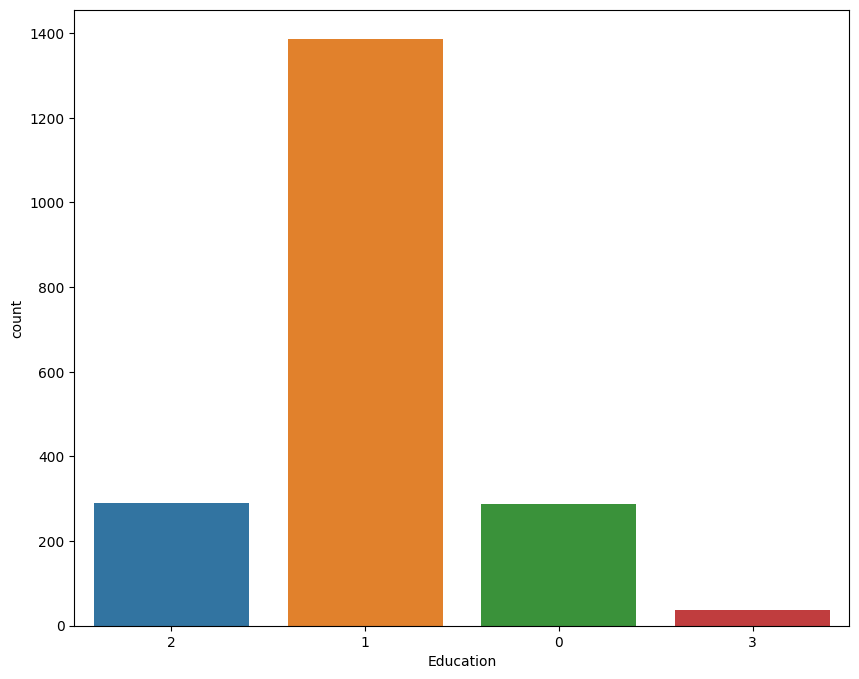

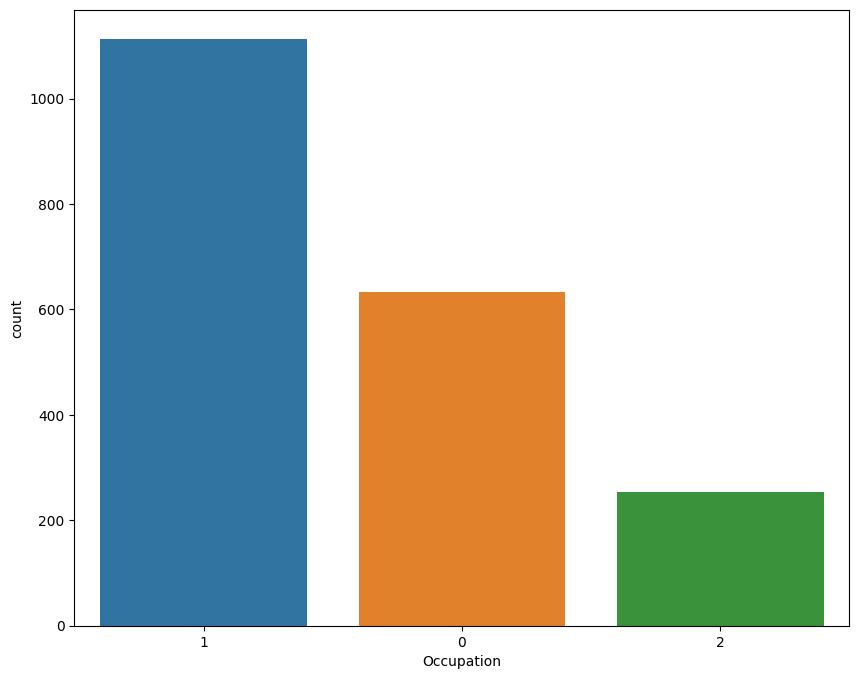

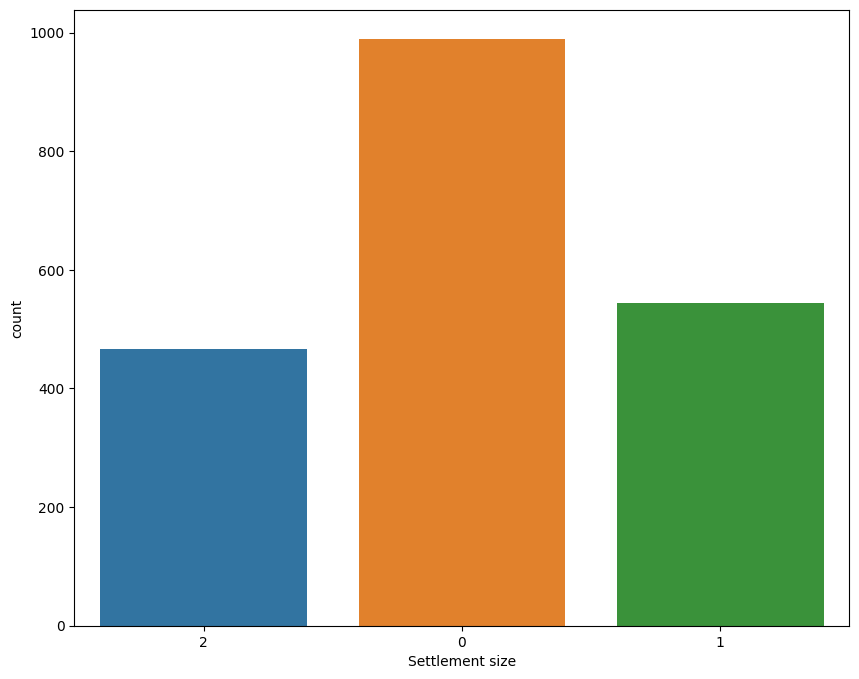

In [13]:
## Categorical variables distribution
for col in cat_columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data = df, x=col)

## Conclusions
-   Customer genders are quite balanced.
-   Marital status is also balanced.
-   Most customers have highschool level education. There are only 1,8% graduate students. We could join both categories ('2' and '3') in a category called university & over.
-   Both the 'Occupation' and 'Settlement size' features seem to have a larger enough quantity of instances of each category.

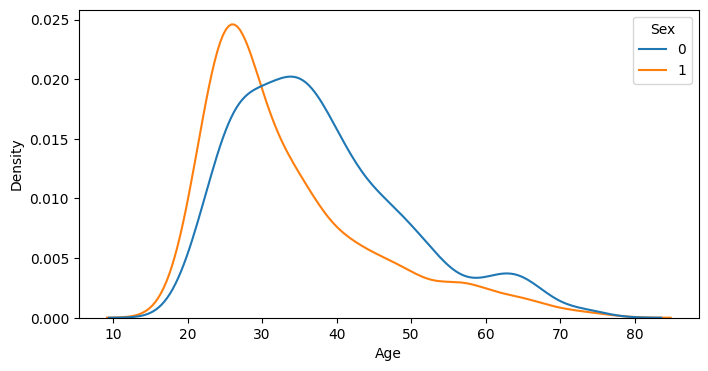

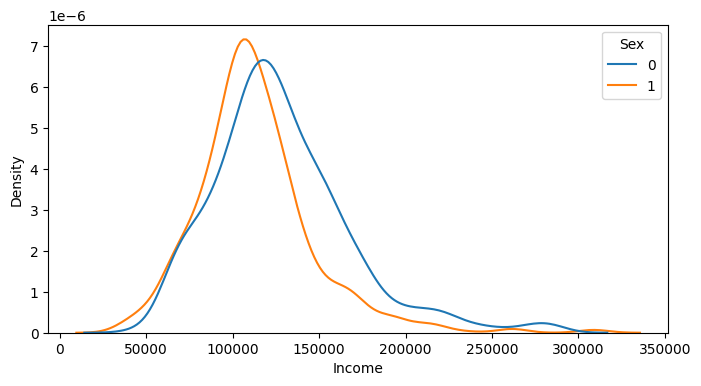

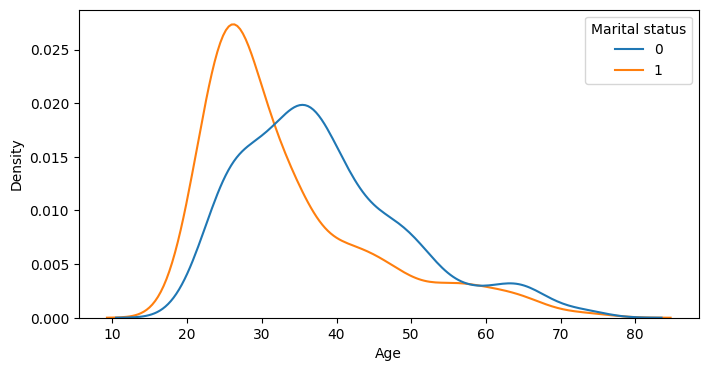

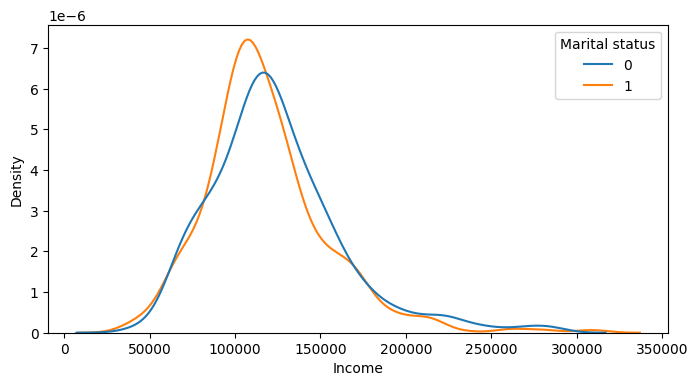

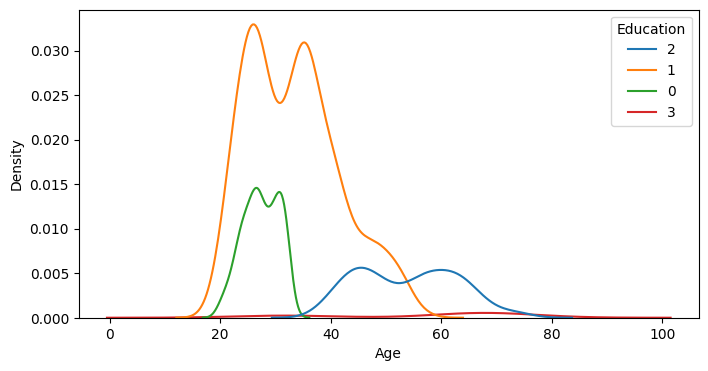

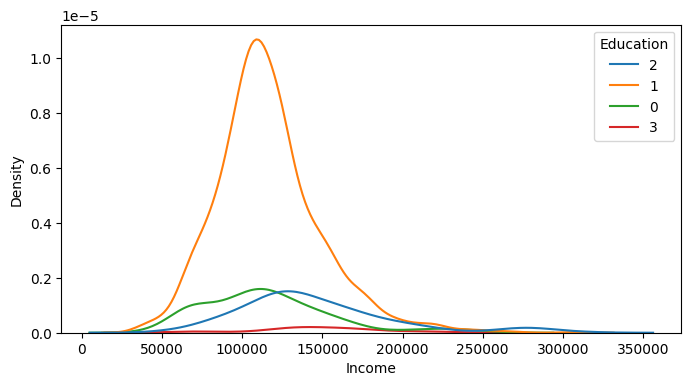

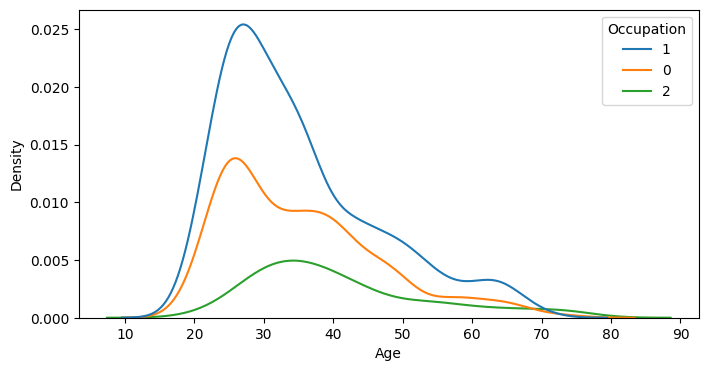

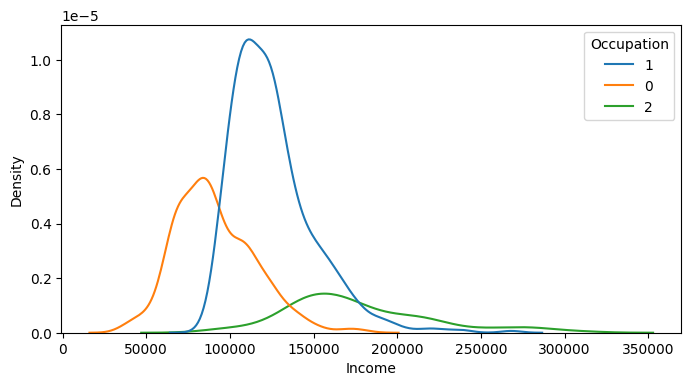

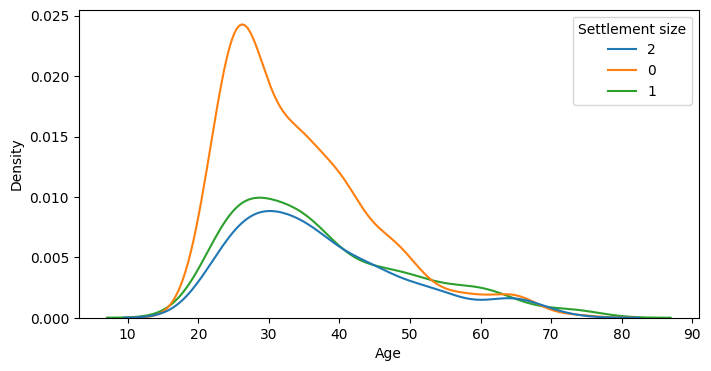

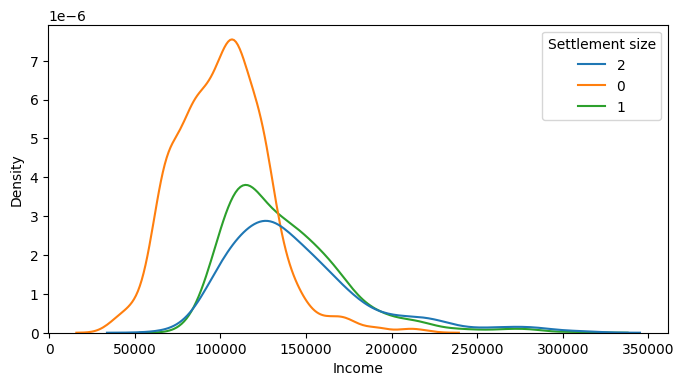

In [14]:
## Categorical vs Numerical
for col_cat in cat_columns:
    for col_num in num_columns:
        if col_num != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=df, x=col_num, hue=col_cat)

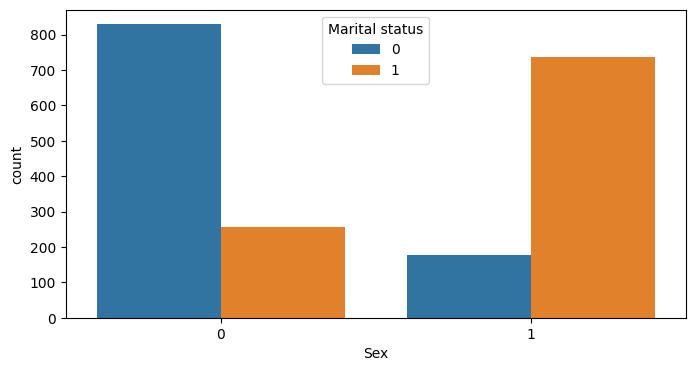

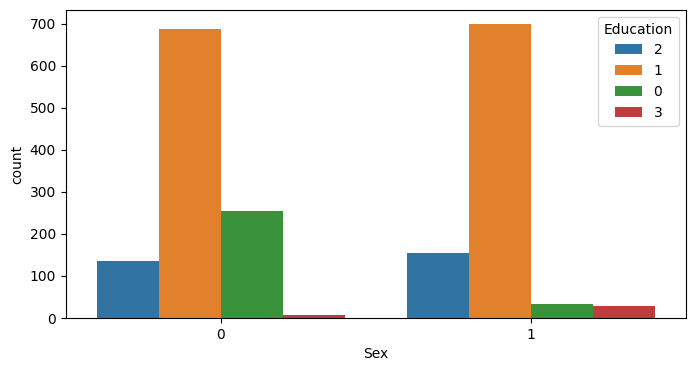

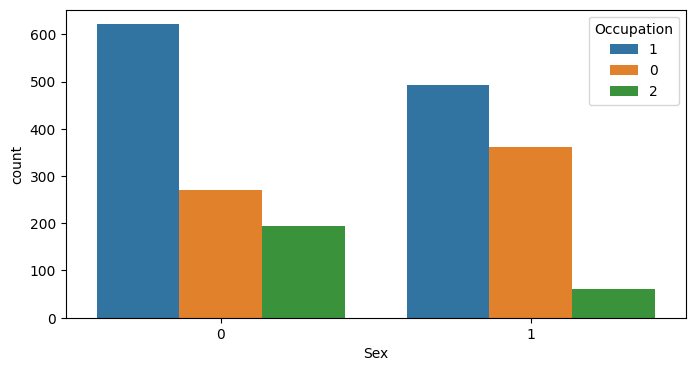

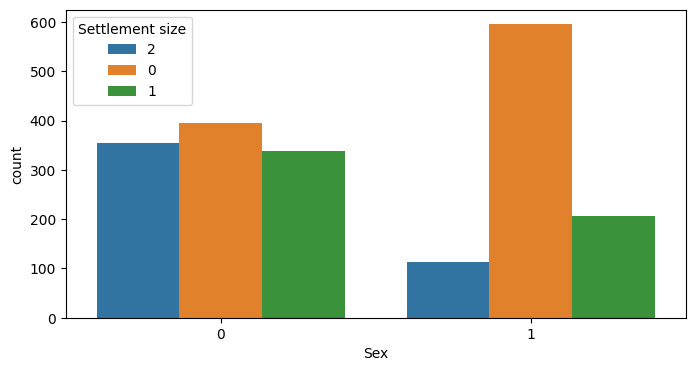

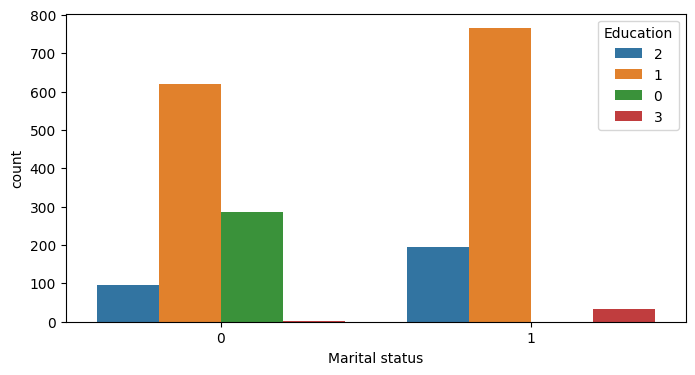

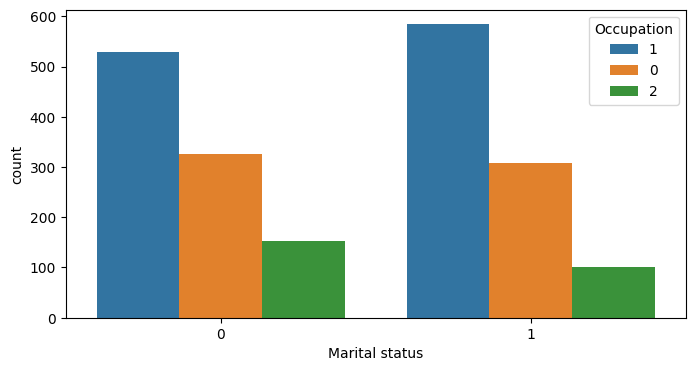

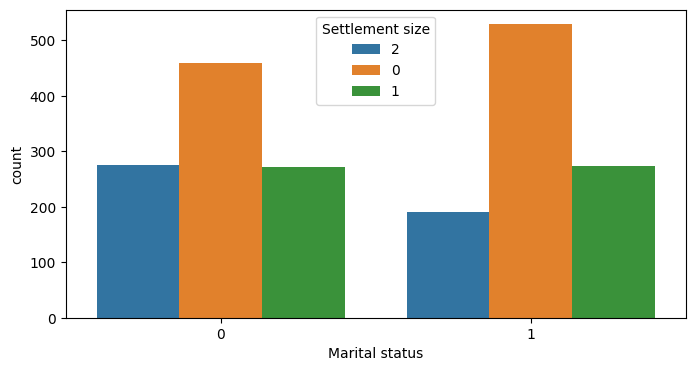

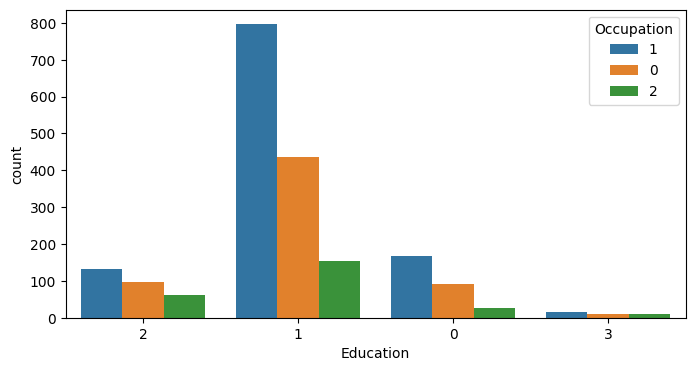

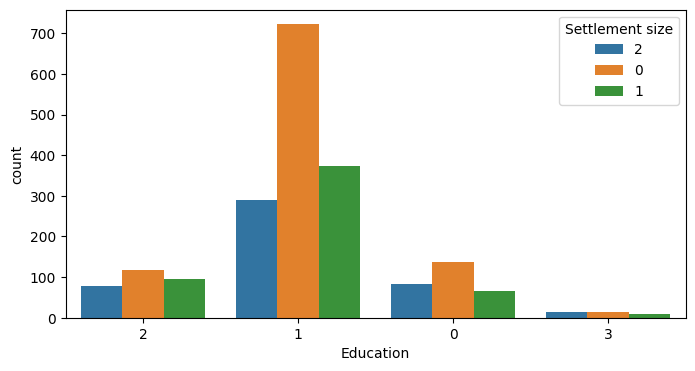

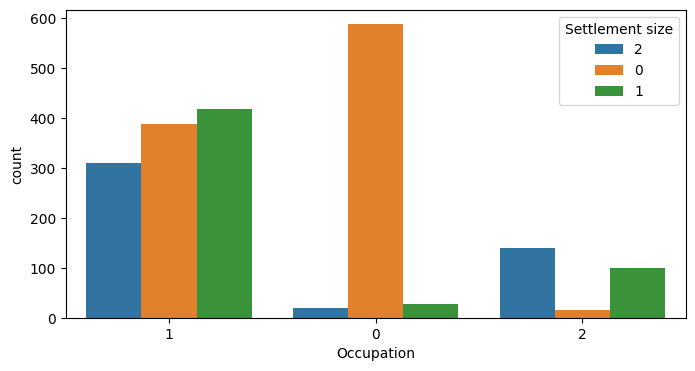

In [15]:
## Categorical vs Categorical
cat_columns_C = cat_columns.copy()
for C1 in cat_columns:
    cat_columns_C.pop(0);
    for C2 in cat_columns_C:
        if C1 != C2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=df, x=C1, hue=C2)

There are a few interesting relationships that can be drawn from the data:

1) People with Occupation = '0' (unemployed) tend to live in small cities within the customers.

2) Married people tend to have either highschool-level or post-graduate-level educations within the customers.

3) Married people also tend to live in smaller cities.

4) Women within the customer list tend to be married more often than men.

5) Males tend to be employed more often within the customer list. Women within the dataset, on the other hand, tend to be unemployed more often

## Feature transformation and scaling

Age and Income feature have a right-skewed normal distribution. We will have to correct that for the model to perform correctly, since it assumes normality in our features. Most likely, a log transform will correct this skew.

In [16]:
# Normality test for the data by using a normality test from scipy
from scipy.stats.mstats import normaltest

print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.Age)[1]))
print('The p-value for the null hypothesis of the Income being Normally distributed is: {}'
     .format(normaltest(df.Income)[1]))

##The p-value for both features is extremely low and we need to transform the data and check for normallity against the transformed data to add it to the model

The p-value for the null hypothesis of the Age being Normally distributed is: 3.3428344869999675e-56
The p-value for the null hypothesis of the Income being Normally distributed is: 2.5009638879187734e-98


In [17]:
# Perform Log Transformation:
df['log_Age'] = np.log1p(df.Age)
df['log_Income'] = np.log1p(df.Income)

# Drop Age & Income columns:
df.drop(['Age','Income'], axis=1,inplace=True)

In [18]:
print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.log_Age)[1]))
print('The p-value for the null hypothesis of the Income being Normally distributed is: {}'
     .format(normaltest(df.log_Income)[1]))

The p-value for the null hypothesis of the Age being Normally distributed is: 8.294533638884815e-25
The p-value for the null hypothesis of the Income being Normally distributed is: 9.420130728049282e-08


<AxesSubplot:>

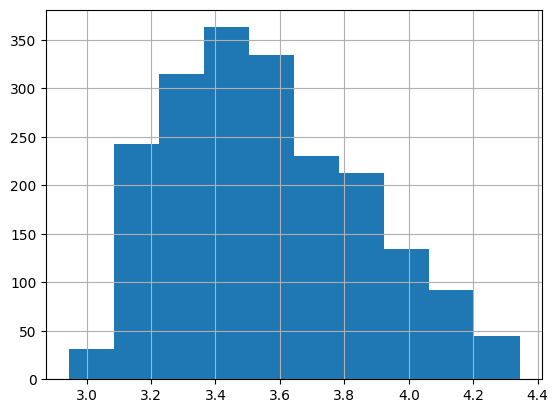

In [19]:
df.log_Age.hist()

<AxesSubplot:>

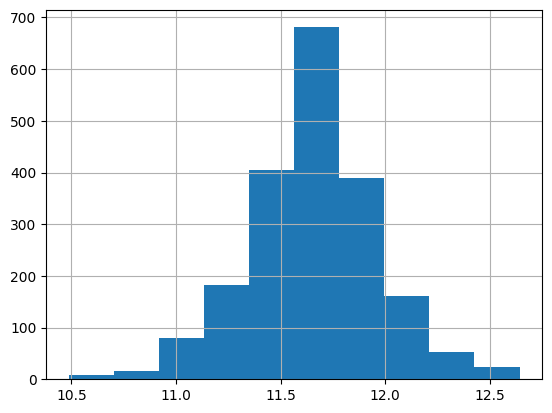

In [20]:
df.log_Income.hist()

In [21]:
## Drop Id column
df.drop('ID', axis=1, inplace=True)

In [22]:
## Feature Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

## Agglormerative Clustering
We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.

We will also be using Complete Linkage as the Linkage Criteria.

The Agglomerative Clustering class will require two inputs:

-   n_clusters: The number of clusters to form as well as the number of centroids to generate.
-   linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    -   Value will be: 'complete'
    -   Note: It is recommended that try everything with 'average' as well

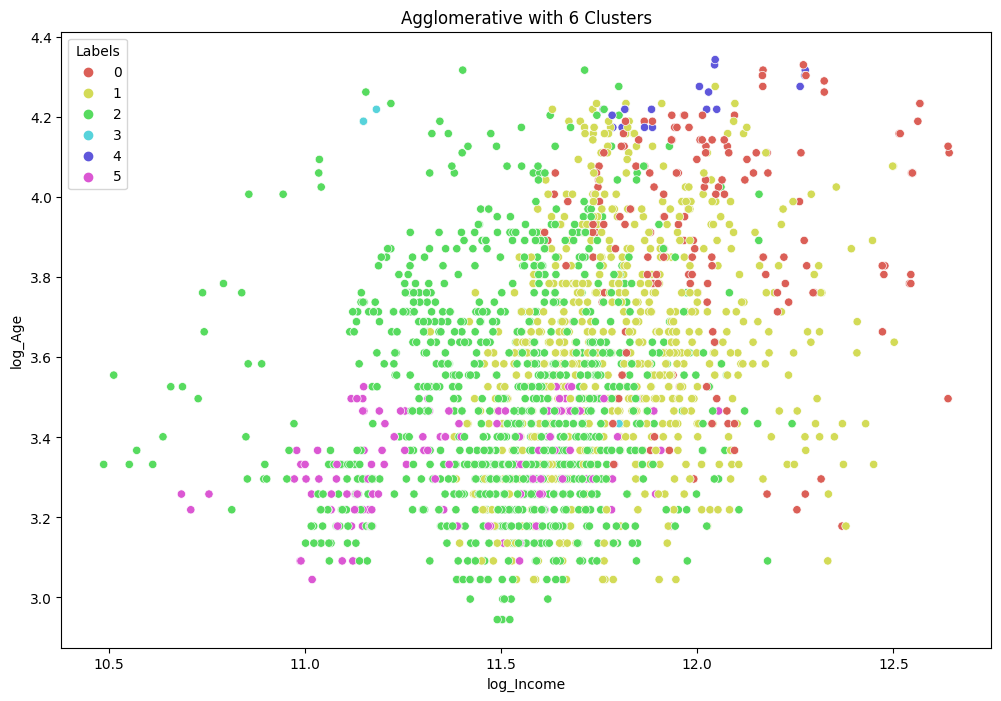

In [29]:
from sklearn.cluster import AgglomerativeClustering 
df_agglo = df.copy()
agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(df_agglo)

df_agglo['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df_agglo['log_Income'], df_agglo['log_Age'], hue=df_agglo['Labels'], 
                palette=sns.color_palette('hls', 6))
plt.title('Agglomerative with 6 Clusters')
plt.show()

## Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a distance matrix contains the distance from each point to every other point of a dataset .
We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.

In [35]:
df_agglo['Sex'] = df_agglo['Sex'].apply(int)
df_agglo['Marital status'] =df_agglo['Marital status'].apply(int)
df_agglo['Occupation'] =df_agglo['Occupation'].apply(int)
df_agglo['Settlement size'] = df_agglo['Settlement size'].apply(int)
df_agglo['Education'] = df_agglo['Education'].apply(int)


In [36]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(df_agglo, df_agglo)
print(dist)

[[0.         2.05212687 2.68450246 ... 5.06977568 3.17164914 5.12682941]
 [2.05212687 0.         2.97966249 ... 4.9415652  2.488539   4.96380754]
 [2.68450246 2.97966249 0.         ... 3.19377465 1.57772708 3.24006913]
 ...
 [5.06977568 4.9415652  3.19377465 ... 0.         3.47515874 0.31237695]
 [3.17164914 2.488539   1.57772708 ... 3.47515874 0.         3.48287821]
 [5.12682941 4.96380754 3.24006913 ... 0.31237695 3.48287821 0.        ]]


## Using the linkage class from hierarchy, pass in the parameters:

-   The distance matrix
-   'complete' for complete linkage

In [37]:
Z = hierarchy.linkage(dist, 'complete')

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

In [41]:
plt.figure(figsize=(18, 500))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

## We used complete linkage for our case, let's change it to average linkage to see how the dendogram changes.

In [42]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 500))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')